## Group 55 - Assignment 2 - Problem 4

<div class="alert alert-block alert-info">
<b>Note:</b>This same notebook serves as our report. proper comments and explanations were prodcued where and when needed. A pdf is also provided along with this notebook.
</div>

***
### Designing a Kohnen Self Organizing Map
***

* The output of KSOM has to be some shades of color mapped over 100 by 100 grid of neurons. 
* The training input of the KSOM are 24 colors (shades of Red, Blue, Green, Yellow, Tale, Pink).
* The shades were picked from https://www.rapidtables.com/web/color/RGB_Color.html

#### Color shades considered :
Maroon, Crimson, Light Coral, Salmon, Orange Red, Yellow Green, Dark Olive Green, Lime Green, Pale Green, Spring Green, Sea Green, Teal, Cyan, Turquoise, Steel Blue, Deep Sky Blue, Midnight Blue, Royal Blue, Blue Violet, Medium Violet Red, Deep Pink, Hot Pink, Light Pink, Light Yellow

In [3]:
#Importing the necessary libraries
import numpy as np 
from matplotlib import pyplot as plt
from IPython.display import Image
%matplotlib inline

The decimal code (R,G,B) of each color chosen are as below and is stored as a numpy array.

In [2]:
color_data= np.array([[128,0,0],[220,20,60],[240,128,128],[250,128,114],[255,69,0],[154,205,50],
                      [85,107,47],[50,205,50],[152,251,152],[0,255,127],[46,139,87],[0,128,128],
                      [0,255,255],[64,224,208],[70,130,180],[0,191,255],[25,25,112],[65,105,225],
                      [138,43,226],[199,21,133],[255,20,147],[255,105,180],
                      [255,182,193],[255,255,224]])

Normalizing the color_data in order to make values between 0 and 1. 

In [3]:
#Using Min-Max Normalization
data_max, data_min = color_data.max(), color_data.min()
color_data= (color_data - data_min)/(data_max - data_min)

The topological neighbourhood of a node 'j' around the winning unit 'i' is given by the following formula.

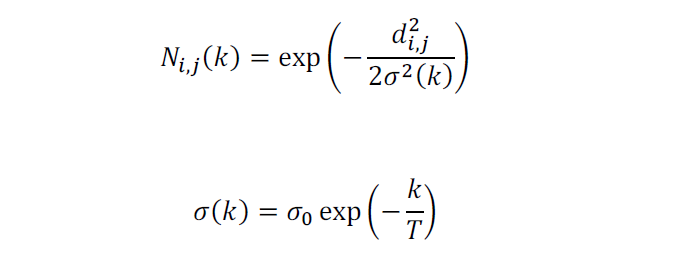

In [4]:
Image("Formulae.PNG",width=600,height=600)

*Image source: From the assignment question.*

This same formula is represented programmatically as below functions.

In [10]:
def neighbour_weights(dis,sigma):
    neigh_weights = np.exp(-((dis*dis)/(2*sigma*sigma)))
    return neigh_weights

def neighbour_calculation(sigma_o,epoch,dis):
    sigma = sigma_o *(np.exp(-(epoch/1000)))
    neigh_weights = neighbour_weights(dis,sigma)
    return neigh_weights

Shades of colors are mapped over 100 by 100 grid of neurons, hence a list of 100 * 100 = 10,000 coordinates is created

In [5]:
coordinates=[]
for i in range (100):
    for j in range (100):
        coordinates.append([i,j])

##### Citation
<div class="alert alert-block alert-info">
<b>Note:</b> The blog <a href="url" target="https://towardsdatascience.com/kohonen-self-organizing-maps-a29040d688da">KSOM</a>  clearly explains the working of KSOM algorithm and this has been referred to better understand the concept and to implement the algorithm. Below are the steps mentioned in the blog and the same has been followed and implemented here:
</div>


###### Initialisation phase
1. Initialise each node’s weight to a random value

###### Training phase
2. Select a random input vector
3. Repeat point 4. and 5. for all nodes in the map.
4. Compute Euclidean distance between the input vector and the weight vector associated with the first node.
5. Track the node that produces the smallest distance.
6. Find the overall Best Matching Unit , i.e. the node with the smallest distance from all calculated ones.
7. Determine topological neighbourhood its radius σ(t) of BMU in the Kohonen Map.
8. Repeat for all nodes in the BMU neighbourhood: Update the weight vector of the first node in the neighbourhood of the BMU by adding a fraction of the difference between the input vector and the weight of the neuron. 
9. Repeat this whole iteration until reaching the chosen iteration limit.


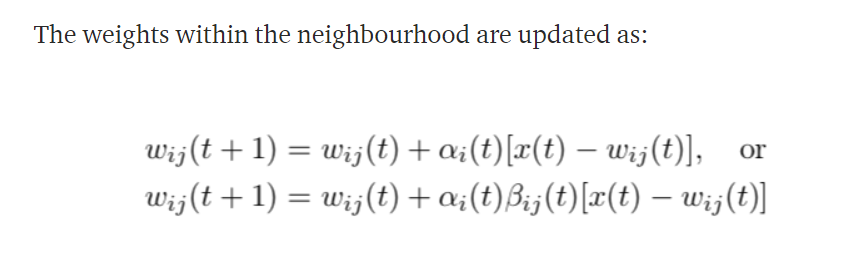

In [8]:
display.Image("Weight_updation.PNG",width=600,height=600)

*Image Source: https://towardsdatascience.com/kohonen-self-organizing-maps-a29040d688da*



The second formula accounts for the influence of neighbourhood denoted by beta in the equation and the first equation does not. As mentioned in the question neighbourhood is to be considered and we choose the second equation for weight updation.

***
##### KSOM Design Implementation

In [4]:
#Initialisation Phase
#Step 1

#We have 3 inputs and 10,000 neurons hence, 3 * 10,000 weights initalized randomly
weights= np.random.rand(3,10000)

In [11]:
#Training Phase
# The training happens here in the 'ksom_algo' which implements the steps 2-9 of algorithm.
# Total number of epochs are chosen to be 1000 as mentioned.

def ksom_algo(sigma_o,weights,color_data,coordinates):
    winner_array=np.array([])
    for epoch in range (1000):
        for j in range (color_data.shape[0]):#24
            for i in range (weights.shape[1]):#10000
                
                #calculating the euclidian distance [Step 2,4]
                euclidian_distance= np.sum(np.square(color_data[j,:] - weights[:,i]))
                winner_array= np.append(winner_array,euclidian_distance)
                
            #node that produces the smallest distance [Step 5]  
            min_distance_index=np.argmin(winner_array)            
 
            for k in range(len(coordinates)):
                #[Step 6]
                winner_dist = np.sum((np.array(coordinates[k])-np.array(coordinates[min_distance_index]))**2)                
                #Topological neighbourhood of BMU [Step 7]
                neighbour_neurons= neighbour_calculation(sigma_o,epoch,winner_dist)                
                #Considering the weight updation formula with neighbourhood, below is the implementation [Step 8]
                weights[:,k] = ((0.8*np.exp(-(epoch/1000)))*(color_data[j,:]-weights[:,k])*neighbour_neurons)+weights[:,k]                
                
            #Clearing the array that stores the euclidian distances   
            winner_array=np.array([]) 
            
        epoch_list=[19,39,99,999]    
        if(epoch in epoch_list):
            print("For Epoch ",epoch+1)
            image=weights.T.reshape(100,100,3) #The output image has to be a 100*100 pixel grid, 3 denotes the color channel.
            plt.imshow(image)
            plt.show()    

##### Output of the KSOM

##### a) Generating a figure of the original grid (random weights) 

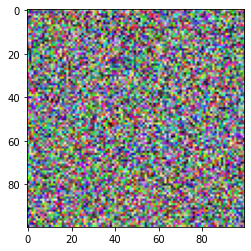

In [5]:
image=weights.T.reshape(100,100,3)
plt.imshow(image)
plt.show()

##### Generating figures of the SOM after 20, 40, 100, 1000 epochs changing the value of 𝜎0(the radius) = 1, 10, 30, 50, 70.

For Radius  1
For Epoch  20


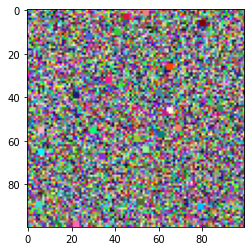

For Epoch  40


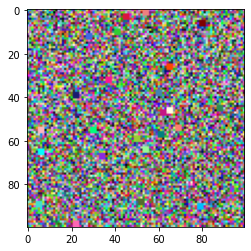

For Epoch  100


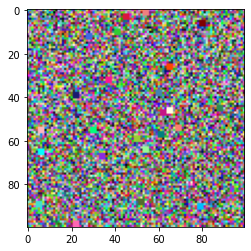

For Epoch  1000


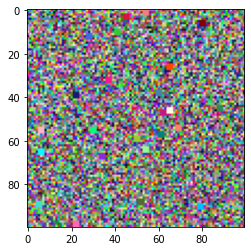

For Radius  10
For Epoch  20


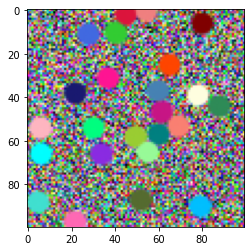

For Epoch  40


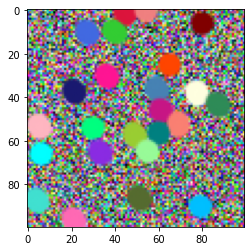

For Epoch  100


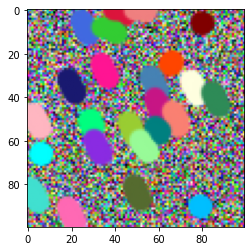

For Epoch  1000


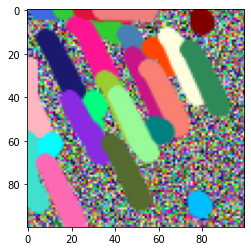

For Radius  30
For Epoch  20


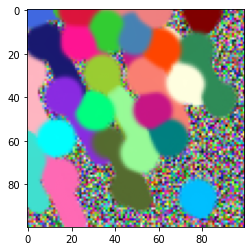

For Epoch  40


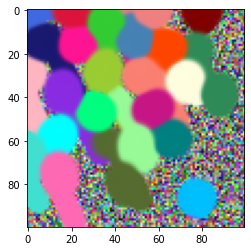

For Epoch  100


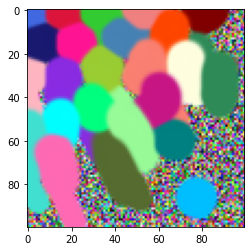

For Epoch  1000


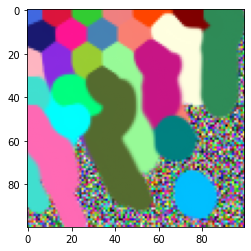

For Radius  50
For Epoch  20


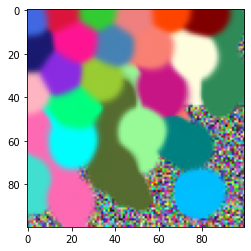

For Epoch  40


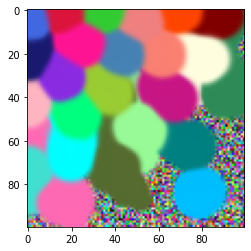

For Epoch  100


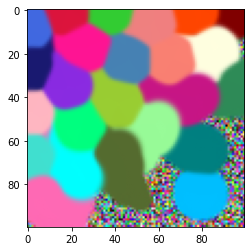

For Epoch  1000


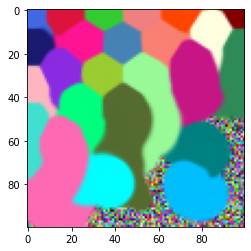

For Radius  70
For Epoch  20


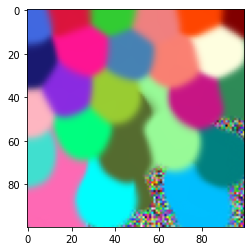

For Epoch  40


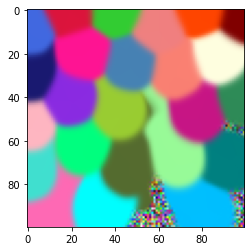

For Epoch  100


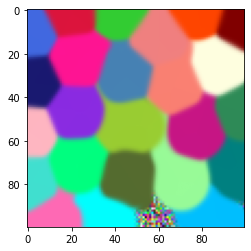

For Epoch  1000


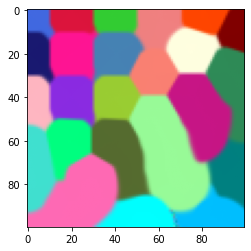

In [11]:
sigma_o=[1, 10, 30, 50,70]  
i=0
while i<len(sigma_o):
    print("For Radius ",sigma_o[i])
    ksom_algo(sigma_o[i],weights,color_data,coordinates)
    i=i+1

##### b)Conclusions drawn


**Background:**
> The Kohonen's Self-Organizing Map (KSOM) belongs to the class of unsupervised learning networks. One major feature of this network is that the nodes distribute themselves across the input space to recognize groups of similar input vectors. However, the output nodes compete among themselves to be fired one at a time in response to a particular input vector.This process is known as competitive learning. It represents a higher dimensional data in a lower dimension.

**Summary:**
>Algorithm steps
>* First, the weights of the nodes are initialized to a random value. 
>* Euclidean distance between the input data and the associated weight vector are found. 
>* The node that produces the smallest distance is considered as winning node. 
>* The weights of winning neuron and its neighbours are updated.
>* This is done until the last epoch.<br>
>Function implementing this algorithm has been designed. Output of this is shades of colors mapped over a 100 by 100 grid.
>Figures of SOM after 20, 40, 100, 1000 epochs changing the value of 𝜎0 = 1, 10, 30, 50, 70 has been generated. 
>The learning rate and neighbourhood radius are decreased over time as mentioned in the question.

**Observations:**

>From the figures, it is observed that for the 20 epochs with a radius 1, there were small clusters formed. The clusters are far apart even after 1000 epochs for radius 1.<br>
>Slowly, the clusters size started increasing with an increase in the radius which means the algorithm started understanding the patterns and have started mapping the input colors on to the grid. **At the end of 1000 epochs for radius 70 almost all the training data points are clustered into different colors.**<br>
>Increase in the radius helped in proper cluster formation and increase in the number of epochs helped in clustering all the pixels. This shows the algorithm performed well in clustering the colors chosen.

##### Hint to reproduce the output:

<div class="alert alert-block alert-info">
Call the function ksom_algo with arguments radius, initial weights, input_data, list of 10,000 coordinates <br>
Example: ksom_algo(1,weights,color_data,coordinates)<br>
This will output a grid of 100 * 100 with shades of colors.
</div>

In [ ]:
#Use
#radius=1
#ksom_algo(radius,weights,color_data,coordinates)